# Pymaceuticals Inc.

The correlation coefficient suggested a moderate positive correlation between mouse weight and tumor volume, indicating that heavier mice tended to have larger tumors.
The linear regression model confirmed this relationship, with the slope indicating the expected increase in tumor volume per additional gram of mouse weight.

 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mouse_study.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [15]:
# Checking the number of mice.
number_of_mice = mouse_study['Mouse ID'].nunique()
number_of_mice

249

In [16]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice

array(['g989'], dtype=object)

In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study = mouse_study[mouse_study['Mouse ID'].isin(duplicate_mice)==False]
clean_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = clean_study['Mouse ID'].nunique()
clean_number_of_mice

248

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


means = clean_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = clean_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sds = clean_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = clean_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":sds,
                              "Tumor Volume Std. Err.":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

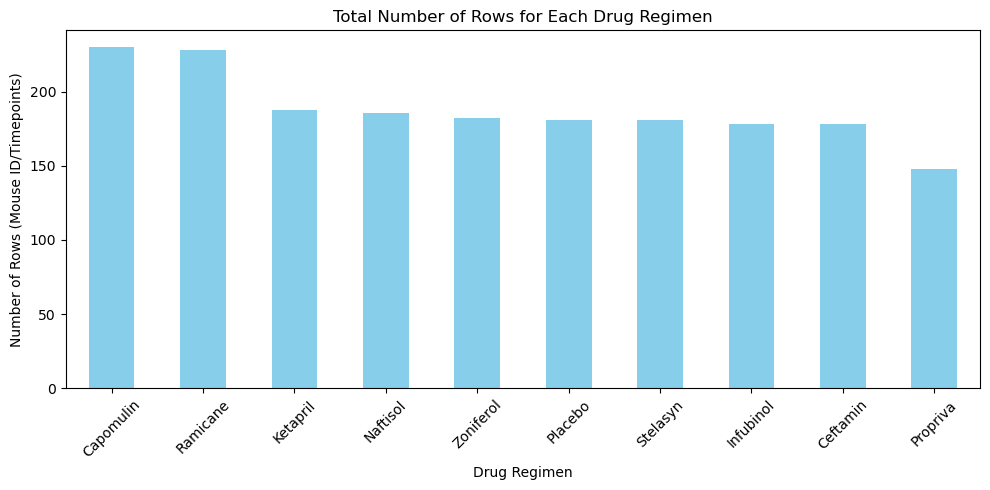

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_study['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar', figsize=(10, 5), color='skyblue')

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')


# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


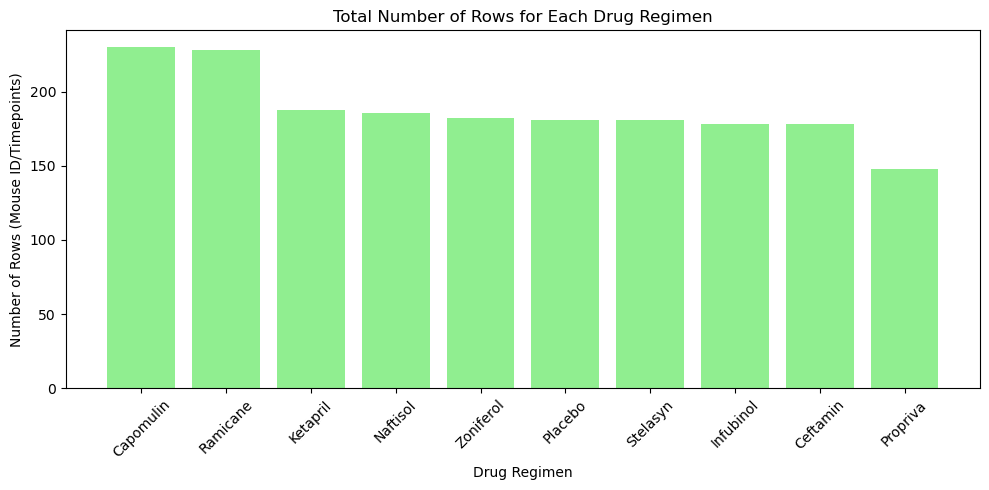

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts_py = clean_study['Drug Regimen'].value_counts()

# Create the bar plot using pyplot
plt.figure(figsize=(10, 5))
plt.bar(drug_counts.index, drug_counts.values, color='lightgreen')

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

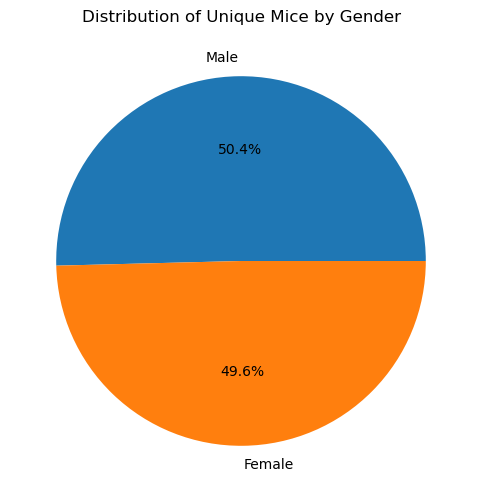

In [22]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_study[['Mouse ID', 'Sex']].drop_duplicates()

# Make the pie chart
gender_counts = unique_mice['Sex'].value_counts()

# Create a pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', ylabel='', title='Distribution of Unique Mice by Gender', figsize=(6, 6))

# Show the plot
plt.show()

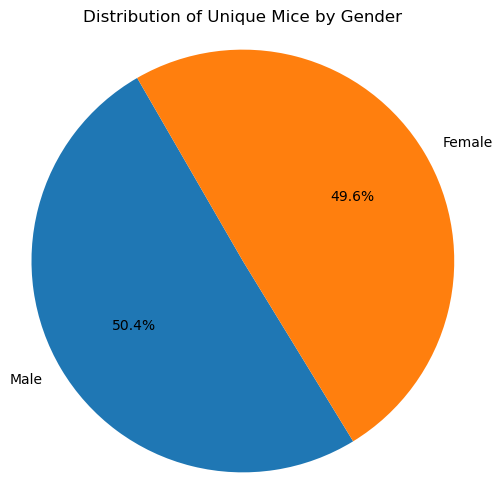

In [23]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice = clean_study[['Mouse ID', 'Sex']].drop_duplicates()

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

# Set the title and labels
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Distribution of Unique Mice by Gender')
plt.axis('equal') 

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_study.groupby('Mouse ID').agg({'Timepoint': 'max'})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, clean_study, on=['Mouse ID', 'Timepoint'])
final_tumor_volume = merged_df[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
print(final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])

    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
238     y769     Ceftamin           68.594745
239     y793    Capomulin           31.896238
240     y865     Ceftamin           64.729837
244     z578     Ramicane           30.638696
245     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [25]:
#Create a grouped DataFrame that shows the last (greatest) time point for each mouse
last_timepoint_df = clean_study.groupby('Mouse ID').agg({'Timepoint': 'max'}).reset_index()

#Merge this grouped DataFrame with the original cleaned DataFrame
merged_df = pd.merge(last_timepoint_df, clean_study, on=['Mouse ID', 'Timepoint'])

#Create a list that holds the treatment names and an empty list for tumor volume data
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []

#Loop through each drug in the treatment list
for drug in treatments:
    # Locate the rows corresponding to each treatment
    treatment_data = merged_df[merged_df['Drug Regimen'] == drug]
    
    # Append the final tumor volumes to the list
    tumor_volumes.append(treatment_data['Tumor Volume (mm3)'].values)

# Calculate quartiles and IQR, and determine outliers
for i, drug in enumerate(treatments):
    
    data = tumor_volumes[i]
    
    # Calculate the quartiles
    quartiles = np.percentile(data, [25, 50, 75])
    q1, q2, q3 = quartiles
    
    # Calculate IQR
    iqr = q3 - q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    #Find outliers
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    #Display the results
    print(f"{drug}:")
    print(f"  Quartiles: Q1 = {q1}, Q2 (Median) = {q2}, Q3 = {q3}")
    print(f"  IQR = {iqr}")
    print(f"  Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
    print(f"  Outliers: {outliers}\n")


Capomulin:
  Quartiles: Q1 = 32.37735684, Q2 (Median) = 38.1251644, Q3 = 40.1592203
  IQR = 7.781863460000004
  Lower Bound = 20.70456164999999, Upper Bound = 51.83201549
  Outliers: []

Ramicane:
  Quartiles: Q1 = 31.56046955, Q2 (Median) = 36.56165229, Q3 = 40.65900627
  IQR = 9.098536719999998
  Lower Bound = 17.912664470000003, Upper Bound = 54.30681135
  Outliers: []

Infubinol:
  Quartiles: Q1 = 54.04860769, Q2 (Median) = 60.16518046, Q3 = 65.52574285
  IQR = 11.477135160000003
  Lower Bound = 36.83290494999999, Upper Bound = 82.74144559000001
  Outliers: [36.3213458]

Ceftamin:
  Quartiles: Q1 = 48.72207785, Q2 (Median) = 59.85195552, Q3 = 64.29983003
  IQR = 15.577752179999997
  Lower Bound = 25.355449580000002, Upper Bound = 87.66645829999999
  Outliers: []



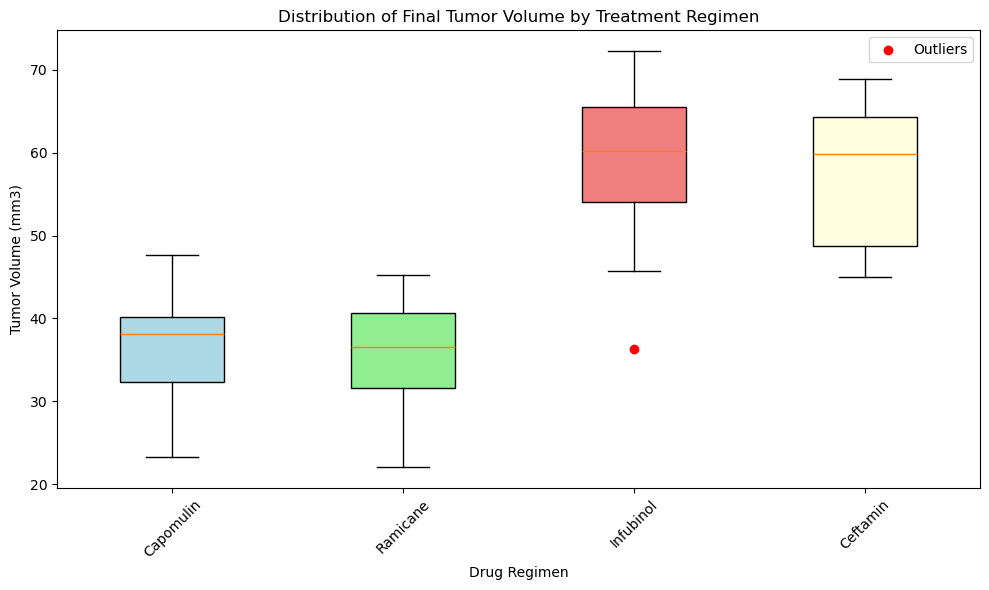

In [27]:

# Prepare the data: Create a list of tumor volumes for each treatment
data = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)'].values for drug in treatments]

# Create the box plot
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(data, patch_artist=True, showfliers=False)

# Customize box plot colors
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

# Overlay outliers
for i, drug in enumerate(treatments):
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Calculate the quartiles and IQR
    quartiles = np.percentile(treatment_data, [25, 50, 75])
    q1, q2, q3 = quartiles
    iqr = q3 - q1
    
    # Determine bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Plot the outliers with a different color
    plt.scatter([i + 1] * len(outliers), outliers, color='red', marker='o', label='Outliers' if i == 0 else "")

# Set the title and labels
plt.title('Distribution of Final Tumor Volume by Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(np.arange(1, len(treatments) + 1), treatments, rotation=45)

# Show the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


## Line and Scatter Plots

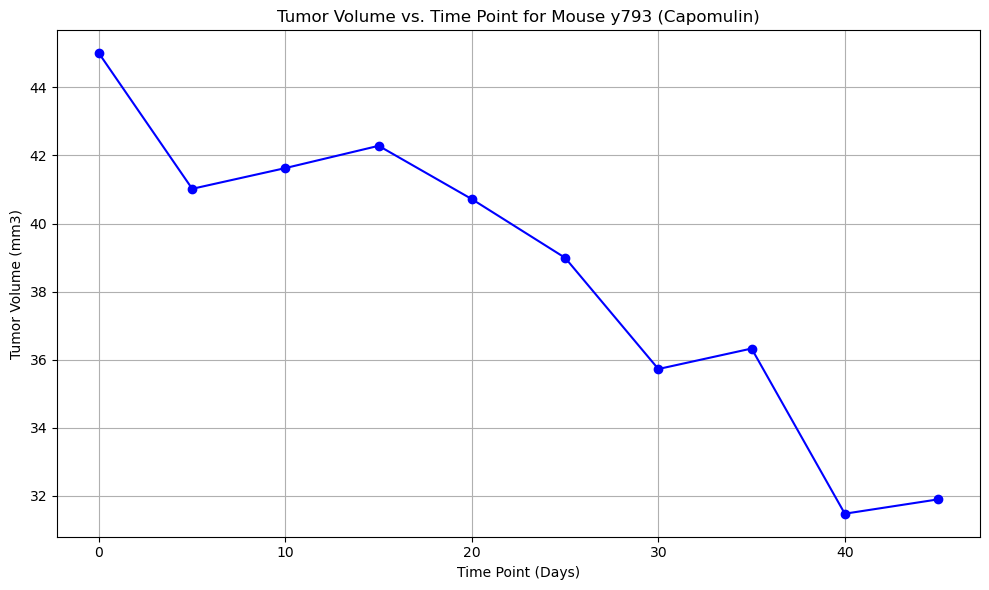

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'y793' 

# Filter the DataFrame for the specific mouse and treatment
mouse_data = clean_study[(clean_study['Mouse ID'] == mouse_id) & (clean_study['Drug Regimen'] == 'Capomulin')]

# Sort the data by time point (if not already sorted)
mouse_data = mouse_data.sort_values('Timepoint')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='blue')

# Set the title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


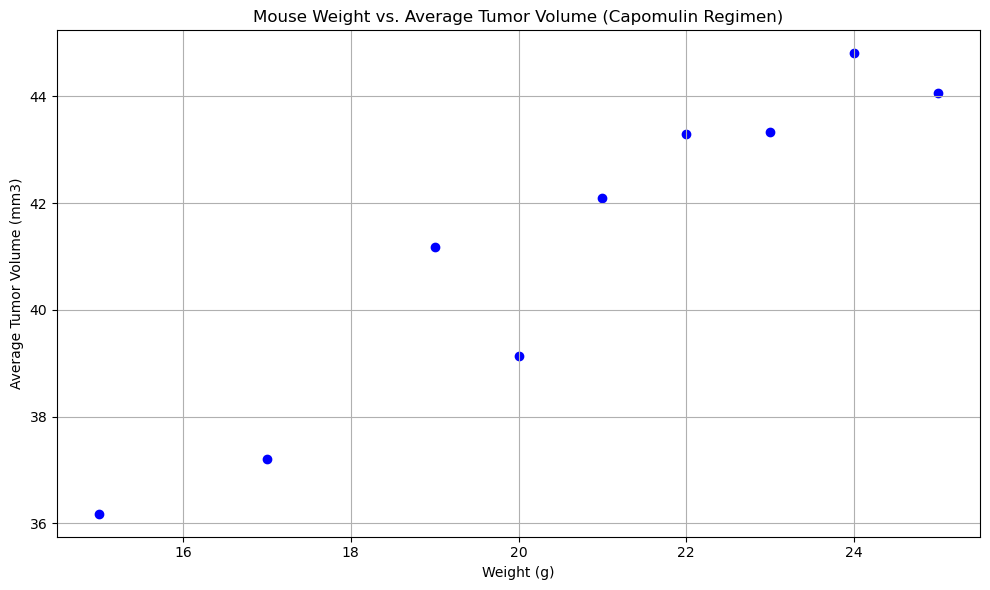

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_study[clean_study['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse weight
avg_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='blue', marker='o')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


## Correlation and Regression

Correlation coefficient: 0.9505243961855268
Slope: 0.8947726097340709, Intercept: 22.764229983591733


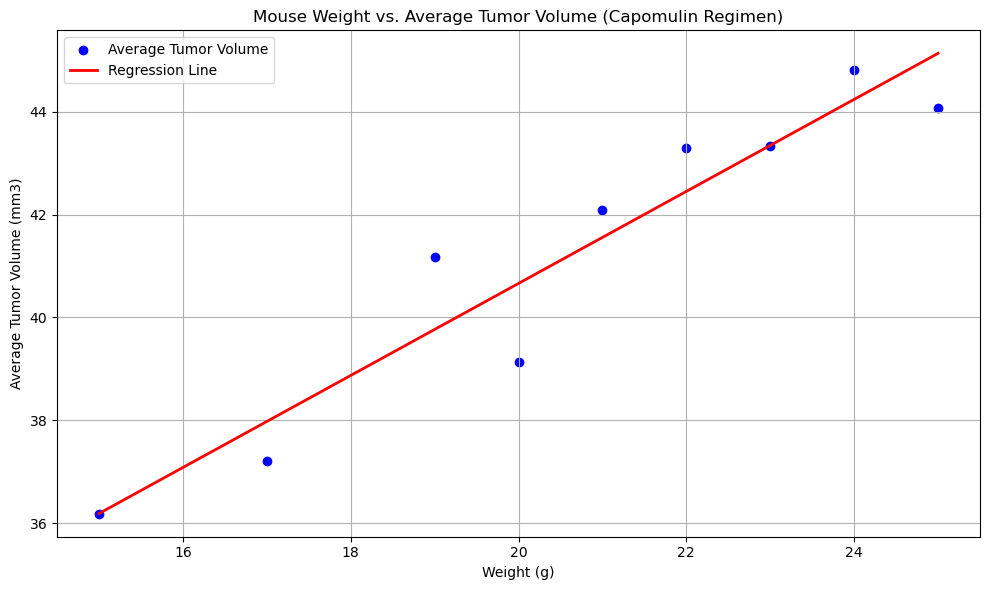

In [35]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_study[clean_study['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse weight
avg_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Calculate the correlation coefficient
correlation = np.corrcoef(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])[0, 1]
print(f"Correlation coefficient: {correlation}")

# Calculate the slope and intercept manually
x = avg_tumor_volume['Weight (g)']
y = avg_tumor_volume['Tumor Volume (mm3)']

n = len(x)
slope = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - (np.sum(x))**2)
intercept = (np.sum(y) - slope * np.sum(x)) / n

# Print the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

# Step 3: Create the regression line
regression_line = slope * x + intercept

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', marker='o', label='Average Tumor Volume')
plt.plot(x, regression_line, color='red', linewidth=2, label='Regression Line')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()
